![alt text](https://camo.githubusercontent.com/213999fa2ac3c88e78097000fe4f6d254bb77b04/687474703a2f2f69766d2e76752e6e6c2f656e2f496d616765732f49564d5f6c6f676f5f726762325f74636d3233342d3835313539342e737667)

# Climate Hydrological Processes - Daisy World Practicum
##### Google Colobatory by Sem Vijverberg and Max van Gerrevink
---

Names students: " Double click on this cell to inset your names and student number" Format this as following: Name 1 (studentnumber), Name 2 (studentnumber) ect.


The goal of this project to gain understanding in how a simulation works and to start getting
familiar with programming. The Daisyworld model was used by Watson and Lovelock to
exemplify how the biosphere could foster ‘homeostasis’ (or equilibrium) within the Earth’s
climate following the Gaia hypothesis. While we are not interested in the original idea in the
Gaya hypothesis, suggesting that the biosphere behaves like a single super-organism aiming
-intentionally- at obtaining a self-regulatory effect on the Earth’s environment. We
recognize that the Daisyworld model is a nice example illustrating the potential role of the
biosphere in controlling/modifying local and global climate.
With the following equations you can simulate the evolution of black and white daisies. 

You will write two main functions called:
1. _DW_simulation_, which is able to simulate the growth and death of daisies as function of time. The simulation must stop when the temperature is in equilibrim. The equilibrium temperature will depend and the planets albedo, which will change due to the
birth and death of black and/or white daisies.
2. _DW_vs_luminosity_, which calls the _DW_simulation_ for different incoming solar insolation values and stores the equilibrium temperatures.


**Hand in:** This Notebook will be your hand-in document, including the code to reproduce results and the answers to the questions. (***one hand in for each team***).

---

## Daisy world Equations

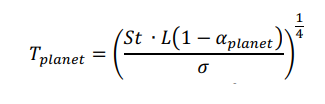

Where, L [-] is luminosity, St is the solar constant [W/m2], sigma is Stefan-Boltzmann constant
(5.67 * 10 ^-8 W/m2 /K4). alpha planet is the albedo of the Daisy World, defined as,

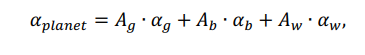

where, area and alpha stand for the area in [m2] and the albedo [-]. The subscripts (g, b and w)
denote (barren) ground, black daisies and white daisies, respectively. The area barren
ground (alpha g) is defined as,

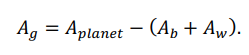

For simplification, the total area of the planet (alpha planet) is set to 1 m2, such that the 3 types of area’s (barren, white daisies, black daisies), also match the ratio of the planet. For example, if Aw = 0.25, then 0.25 m2 (and 25%) of the planet is covered with white daisies. The change in area of daisies is determined by the birth and death-rate, where we keep the death rate constant. The birthrate is depended on the local temperature (T). Below we give an example of calculating the change in area of white daisies. By replacing the w with b, you get the equations for the evolution of black daisies. 

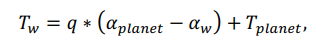

where, Tw [K] is the white daisy local temperature, q [K] is the horizontal insulation, which is a measure of the heat advected across the white daisy area. 

As said, the birth rate of daisies depends on the state variable (i.e. non-constant variables) temperature (Tw is the local temperature of white daisies),

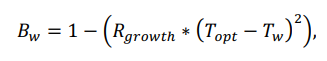

where, Bw is the birthrate in [m2/t], Rgrowth [m2/T/t] is the growth rate parameter, Topt
[K] is the optimal growing temperature of the daisies. This birth rate is plugged into the
equation for the change in area of white daisies [m2/t]. Combining the birth rate and death rate, we get the change in area (A) of white daisies after one timestep.

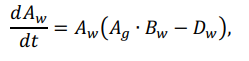

where, Dw is the death rate [t] for white daisies. The change in area is simply given by the simple forward
Euler integration, i.e. yt +1 = yt + (df/dt)*dt. In our equation, setting the time step (dt) at 1 is
sufficient to get stable results. Thus, the area after one time step is given by,

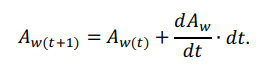

We now have all the formulae’s to perform the simulation. If the updated area (Aw (t+1)) is
different from Aw (t), it will alter the albedo of the planet (alpha planet) and will lead to a different
temperature (T planet). This will lead to a different local temperature (Tw), birthrate, and a change in area, which affects the albedo and so forth.  

Besides getting the equations right, there are two things that you need to hard-code in order to get a good simulation. 
- Prevent a negative birth-rate ($B_w$ and $B_b$). This can be done by using the max function. The function max(0,$B_w$) will return the maximum value of those two values. 
- Prevent that all black/white daisies die. This is needed to avoid that the system gets stuck, because the area of newly born black/white daisies ($A_w$ and $A_b$) is proportional to the 'current' area of black/white daisies. Hence, if the area of black/white daisies ever becomes zero, no more black/white daisy can reproduce. Use the max function such that the area of black/white daisies never drops below 0.01.      

## Code reproducability
To answer the following questions, I want you to have a code which is **reproducible**. I should be able to open your notebooks and generate all output that is needed to answer the
questions listed below. We will change some parameter settings, and re-run the code. In order to re-use the code, we will create functions.

For the Practicum, you need to be farmiliar with Python, lists, for loops, while loops, and functions (arguments and optional arguments).
If you are not fully familiar with these aspects, please go to  
https://github.com/VU-IVM/Learning_Python and go through the  notebooks. Download the repository, put them into your Google Drive, and you can run the relevant notebooks (that start with 0_0, 0_1, 0_2, 0_3) via Google Colab.

## Your Daisy World Code
Write a function _DW_simulation()_ to calculate the evolution of black and white daisies and the corresponding temperature. We want to stop the simulation once the Daisy World is in equilibrium. The equilibrium is reached when the temperature (or the daisy coverage) no longer changes. We can code this e.g. like abs(DW_temperature - DW_next_temp) < 1E-6. Saying the temperature difference between the next timestep and the current timestep is less then 1E-6 K. 



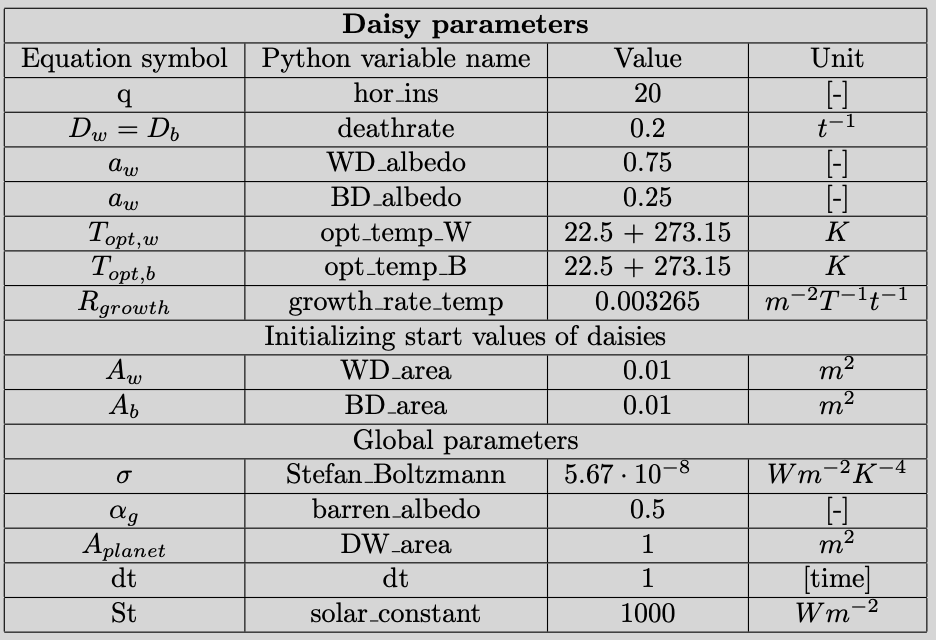

You will need to create python lists to keep track of the planets evolution. Each timestep, you will update the new planets temperature, the area of white & black daisies. To update the lists, you can use the Python built-in [append](https://colab.research.google.com/drive/17hd_Scq2f_CQ40_HPbOahxgUEi18p54J#scrollTo=mN0SIlwisl9G) functionality. In addition to updating the planets temperature, the area of white & black daisies, you will also output the planets temperature without daisies. This value will be constant throughout the DW_simulation. Hence, the lists you need to create are:

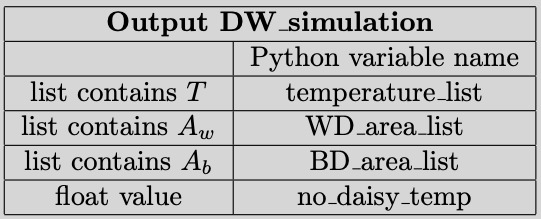

The function DW_simulation should return these for 3 lists and the temperature of the planet without daisies as function of L, written in code as DW_simulation(L).  

The only [positional argument](https://colab.research.google.com/drive/1RM0at5ZB8m4e7Cx7GOalpVLkZjvFPt4a#scrollTo=MuZA3ouEPwLA&line=2&uniqifier=1) of this function will be L, all other parameters will become optional arguments which have default values. When this function is working, we can easily adapt one of the parameters (and keep all the others default) for a certain question. This way, you should be able to generate output for each question without have a very long script where the code is copied again and again.

_Importing libraries_

In [1]:
#First you have to import python libaries, which help you with proccessing data
import matplotlib.pyplot as plt #provides settings to plot data
import numpy as np #mathematical operations on arrays
import sys #module provides information about constants, functions and methods of the Python interpreter

_Initialize model and set parameters_

Set default daisy parameters


In [ ]:
# here

Initializing start values of daisies

In [ ]:
# here

Set global constants

In [ ]:
# here

In [ ]:
# create DW_simulation() here.
# The raw format style and some code of the function is already there, your task
# is to finish it.
# Insert the optional arguments into the function.
def DW_simulation(L):
               
    # Create lists to store different equilibrium values for WD_area, BD_area and temperature.
    WD_area_list     = []
    BD_area_list     = []
    temperature_list = []
    
    Convergence = False
    n = 0
        
    return temperature_list, WD_area_list, BD_area_list, no_daisy_temp



In [ ]:
# DW_vs_luminosity() function, see question 2
# Insert the optional arguments into the function.
def DW_vs_luminosity(luminosity_range):
    # intitalizing lists to store equilibrium state
    eq_temperature = []
    eq_area_WD = []
    eq_area_BD = []
    temp_log_no_daisy = []

    for L in luminosity_range:  
        # ======================================================================
        # Solve equations for single L
        # ======================================================================
        out = DW_simulation() # fill in the DW_simulation function

        temperature_list, WD_area_list, BD_area_list, no_daisy_temp = out
        # ======================================================================
        # save the equilibrium variables for each L
        # ======================================================================
        DW_temp_eq = 
        WD_area = 
        BD_area = 
        eq_temperature.append(DW_temp_eq)
        eq_area_WD.append(WD_area)
        eq_area_BD.append(BD_area)
        temp_log_no_daisy.append(no_daisy_temp)
        
    return eq_temperature, eq_area_WD, eq_area_BD, temp_log_no_daisy

### Your plotting functions

In [ ]:
def plot_DW_vs_time(temperature_list, WD_area_list, BD_area_list):
    # creating a plotting frame, with two subplots

    # plot1: plot the White and Black Daisies areas, and provides appropiate lay-outthem with a label
    # an appropiate layout consitis of: x and y labels, tittle, and a legend


    # plot2: plot the temperature, and provides appropiate lay-outthem with a label
    # an appropiate layout consitis of: x and y labels, tittle, and a legend
    
    
    plt.show()

In [ ]:
def plot_DW_vs_lum(luminosity_range, eq_temperature, temp_log_no_daisy, eq_area_WD, eq_area_BD):
    # creating a plotting frame, with two subplots

    # plot1: plot the luminosity range vs the temperature with and without daisies, and provides appropiate lay-outthem with a label
    # an appropiate layout consitis of: x and y labels, tittle, and a legend


    # plot2: plot the luminosity range vs the area of White and Black daisies, and provides appropiate lay-outthem with a label
    # an appropiate layout consitis of: x and y labels, tittle, and a legend
    
    
    plt.show()

# Daisy World questions


## Evolution of black and white daisies

**Task:** Create the _DW_simulation_(L) function with all its default parameters. Please read the text below the header _Your Daisy World Code_.

**Task:** Plot the evolution of the two daisies in a single supplot and plot the corresponding evolution of temperature in another supplot. 

In [ ]:
# call function
temperature_list, WD_area_list, BD_area_list, no_daisy_temp = DW_simulation(L=1)
# call plotting function Daisy World over time


**Question**: The evolution of black and white daisies as function of time is shown in the figure, decribe what is happening.

_Answer_:

## Find equilibrium temperature as function of solar insolation

Create numpy array for luminosity. The numpy array 'luminosity_range' will point to the list of Luminisity values (L) we will use, i.e. ranging from 0.5 to 1.7 with intervals of 0.002.

**Task:** Create function _DW_vs_luminosity_() below the _DW_simulation_ function. The daisy world function should run _DW_simulation_ for different L values and store the equilibrium temperature in lists called: 

eq_temperature, eq_area_WD, eq_area_BD, temp_log_no_daisy

**Task:** Create a plotting function and place in under the header _Your Plotting functions_ to show the DW equilibium as function of luminosity. Plot the equilibium daisy coverage (left subplot) and DW equilibium temperature (right subplot)

In [ ]:
# create a sequence of numbers (i.e. an array) using the numpy python library
luminosity_range = np.arange(0.5, 1.8, 0.002) # [-]
#luminosity_range = luminosity_range[::-1] <-- to reverse the array, needed for future question on hysteresis

In [ ]:
# call function
out = DW_vs_luminosity(luminosity_range)
eq_temperature, eq_area_WD, eq_area_BD, temp_log_no_daisy = out

# call plotting function the Daisy World vs luminosity


**Question:** Briefly describe what you see in the figure.

_Answer:_

## Experiments
When you have your code finished, perform the following experiments. All variables should remain default, except for the variable you are changing.

### Changing albedo experiment

**Task:** Change WD_albedo to 0.8 and BD_albedo to 0.2.


In [ ]:
# Python dictionary can be used to replace optional arguments. These 
# dictionaries are often called kwrgs, short for Keyword Arguments
kwrgs = {}

# call function
out = DW_vs_luminosity(luminosity_range, **kwrgs)
eq_temperature, eq_area_WD, eq_area_BD, temp_log_no_daisy = out

# call plotting function Daisy World vs luminosity



**Question:** Intepret what changed.

_Answer:_

### Changing optimal temperature black daisies experiment

**Task:** Change optimal temperature black daisies to 10 degrees Celsius (283.15 Kelvin).


In [ ]:
opt_temp_B = # degrees C
opt_temp_B += # convert to K
kwrgs = {'opt_temp_B' : opt_temp_B}

# call function
out = DW_vs_luminosity(luminosity_range, **kwrgs)
eq_temperature, eq_area_WD, eq_area_BD, temp_log_no_daisy = out

# call plotting function Daisy World vs Luminosity



**Question:** Intepret what changed.

_Answer:_

### Show Hysteresis

**Task:** Show hysteresis. Test if order (low-to-high) or (high-to-low) of luminosity values matter for the evolution of the DW equilibrium temperature.


In [ ]:
# From low-to-high luminosity
out = DW_vs_luminosity(luminosity_range) 
eq_temperature, eq_area_WD, eq_area_BD, temp_log_no_daisy = out

# call plotting function Daisy World vs Luminosity


# From high-to-low luminosity
# invert the luminosity list/nparray

# call function
out = DW_vs_luminosity(luminosity_range[::-1]) 
eq_temperature, eq_area_WD, eq_area_BD, temp_log_no_daisy = out
# call plotting function Daisy World vs Luminosity



**Question:** Explain why we observe hysteresis.

_Answer:_

## General questions

**Question:** What other processes could be implemented to make the model more realistic?


_Answer:_



**Question:** What are other physical/biosphysical real-world processes that can lead to significant
feedbacks at the local and global scale?


_Answer:_


**Question:** Can you think of other types of feedbacks leading to a stabilization of the Earth’s local or global climate (homeostasis)? 

_Answer:_